In [62]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
import tkinter as tk
from tkinter import filedialog
import itertools
from colour import Color
from datetime import date

## Names and Palette ##

In [63]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2023-01-17


'2023-01-17'

In [64]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

EBconc = '[EB] ' r'$(n M)$'
EB = 'EB'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

In [65]:
Type_order = ['None', 'WT', 'R76S','P191R']
category_Type = CategoricalDtype(Type_order, ordered=True,) #order mutants

In [88]:
black = '#000000'
grey = '#777777'
blue = '#23459C'
cyan = '#0089CF'
green = '#79BA1A'
purple = '#AB4A9C'
lily = '#CB81EA'
magenta = '#D80B8C'
red = '#e60000'
orange = '#FF7300'
darkorange = '#FF5B00'
lightorange = '#FFAC83'
yellow = '#FFCB05'
lightyellow = '#F9DC2D'
pink = '#FFA4CD'
StartHue1 = Color(purple)
DC1color = list(StartHue1.range_to(Color(pink),3))
StartHue2 = Color(darkorange)
DC2color = list(StartHue2.range_to(Color(lightorange),3))
print(DC1color,DC2color)

palette = [grey,cyan] + list(map(Color.get_hex,DC1color)) + list(map(Color.get_hex,DC2color)) + [green]
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]

[<Color #ab4a9c>, <Color #e468b8>, <Color #ffa4cd>] [<Color #ff5b00>, <Color #ff8341>, <Color #ffac83>]


## Join Data ##

In [67]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [34]:
files = [x for x in path.iterdir() if x.is_file()]
files = [i for i in files if (str(i)[-10:] != 'results.csv') == True]
files = [i for i in files if (str(i)[-3:] == 'csv') == True]
files

[]

In [8]:
data = pd.read_csv(files[0], encoding='utf-8')
for i in range(1,len(files)):
    d = pd.read_csv(files[i], encoding='utf-8')
    data = pd.concat([data,d])

In [9]:
data[Type] = data[Type].astype(category_Type)
data = data.sort_values(by=[Type, DCXconc])
#FIX CONCENTRATION
#data[DCXconc] = data[DCXconc].apply(lambda x: round(x*2.27))
#np.sort(data[DCXconc].unique())

In [10]:
data

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
0,2022-12-19,Brandi,1,6.0,0.0,0.0,0.6955,5.898500,0.117911,5.424389,1.070,0.251000,4.262948,False,WT
1,2022-12-19,Brandi,1,6.0,0.0,0.0,0.8560,6.275000,0.136414,18.769222,1.070,0.251000,4.262948,False,WT
2,2022-12-19,Brandi,1,6.0,0.0,0.0,0.8560,2.761000,0.310033,6.804889,0.856,0.167333,5.115538,False,WT
3,2022-12-19,Brandi,1,6.0,0.0,0.0,1.0700,2.677333,0.399651,3.374556,1.070,0.167333,6.394422,False,WT
4,2022-12-19,Brandi,1,6.0,0.0,0.0,0.7490,2.259000,0.331563,10.486222,0.856,0.083667,10.231076,False,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,2023-01-02,Brandi,4,6.0,0.0,20.0,1.9260,1.637333,1.176303,6.779583,1.926,0.051167,37.641694,False,NaN
60,2023-01-02,Brandi,4,6.0,0.0,20.0,0.7490,0.818667,0.914902,8.723917,0.856,NaN,NaN,False,NaN
61,2023-01-02,Brandi,4,6.0,0.0,20.0,1.6050,1.790833,0.896231,10.258917,1.819,0.153500,11.850163,False,NaN
62,2023-01-02,Brandi,4,6.0,0.0,20.0,3.1030,3.172333,0.978144,12.305583,3.103,0.204667,15.161238,False,NaN


In [11]:
data.to_csv(path/(date+'_MasterSheet.csv'), encoding='utf-8', index=False)

## Open data if already saved ##

In [68]:
askmastersheet = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askmastersheet, encoding='utf-8')
data

,Date,Investigator,Ch,[Tubulin] $(\mu M)$,[DCX] $(n M)$,[EB] $(n M)$,Length $(\mu m)$,Lifetime $(min)$,Growth Rate $(\mu m / min)$,Time to Nucleate $(min)$,Shrink Length $(\mu m)$,Shrink Lifetime $(min)$,Shrink Rate $(\mu m / min)$,Rescues,DCX Type
0,2022-12-19,Brandi,1,6,0,0,0.6955,5.898500,0.117911,5.424389,1.070,0.251000,4.262948,False,WT
1,2022-12-19,Brandi,1,6,0,0,0.8560,6.275000,0.136414,18.769222,1.070,0.251000,4.262948,False,WT
2,2022-12-19,Brandi,1,6,0,0,0.8560,2.761000,0.310033,6.804889,0.856,0.167333,5.115538,False,WT
3,2022-12-19,Brandi,1,6,0,0,1.0700,2.677333,0.399651,3.374556,1.070,0.167333,6.394422,False,WT
4,2022-12-19,Brandi,1,6,0,0,0.7490,2.259000,0.331563,10.486222,0.856,0.083667,10.231076,False,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,2023-01-02,Brandi,4,6,0,20,1.4980,1.176833,1.272908,4.988750,1.498,0.102333,14.638436,False,WT
177,2023-01-02,Brandi,4,6,0,20,1.9260,1.637333,1.176303,6.779583,1.926,0.051167,37.641694,False,WT
178,2023-01-02,Brandi,4,6,0,20,1.6050,1.790833,0.896231,10.258917,1.819,0.153500,11.850163,False,WT
179,2023-01-02,Brandi,4,6,0,20,3.1030,3.172333,0.978144,12.305583,3.103,0.204667,15.161238,False,WT


In [69]:
pathmastersheet = Path(askmastersheet)
resultdirectory = str(pathmastersheet.parents[0])+'//Plots'
newmydir = Path(resultdirectory)
newmydir.mkdir(exist_ok=True)
path = newmydir
path

WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/DCX_EB_Dynamics/Plots')

## Seaborn plot #

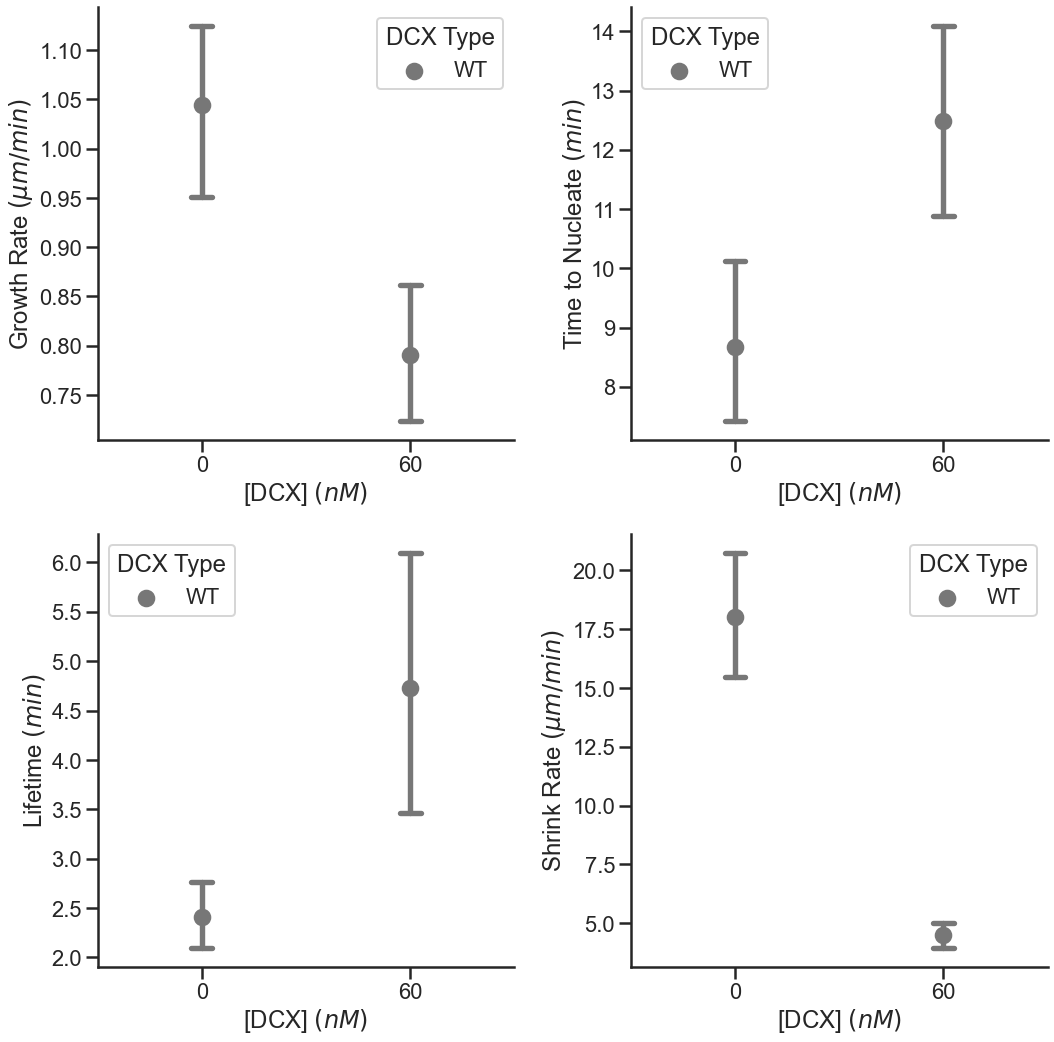

In [70]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=DCXconc, y=parameters[c],
                        hue=Type, err_style="bars", marker='o', join=False, capsize=.1,
                        data=data[ (data[tubulin]==6)],err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(path/('tub6uM_DCX-variable'+date+'.pdf'))
plt.savefig(path/('tub6uM_DCX-variable'+date+'.png'))

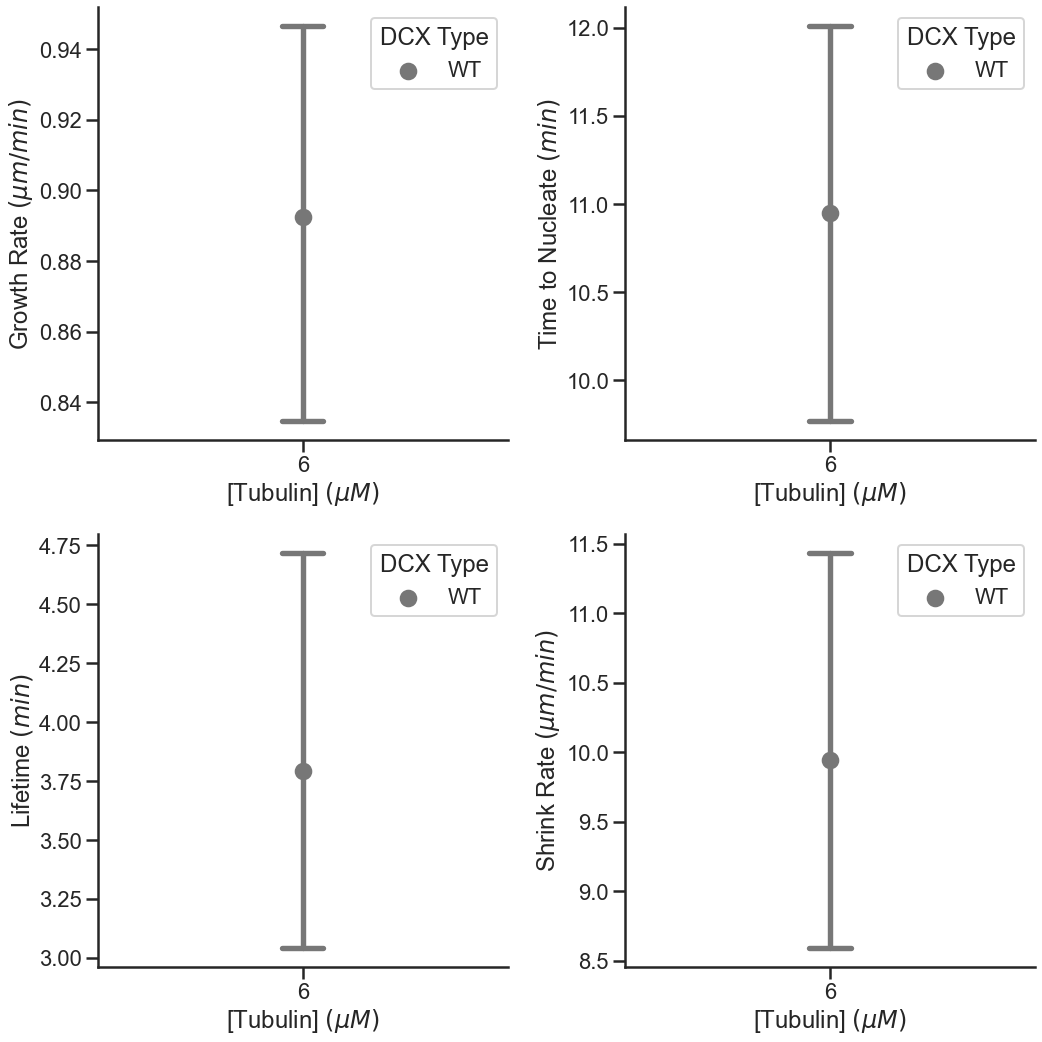

In [71]:
fig, axs = plt.subplots(2,2,figsize=(15,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x=tubulin, y=parameters[c],
                        hue=Type, style = DCXconc , err_style="bars", marker='o', join=False, capsize=.1,
                        data=data,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
        
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()
plt.savefig(path/('plots'+date+'.pdf'))
plt.savefig(path/('plots'+date+'.png'))

# Fitting Data #

In [72]:
def gaussian(x, mu, sig):
    return (np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.))) )/(sig*np.sqrt(2*np.pi))

def exponential(x, scale):
    return ((np.exp(-x/scale) )/(scale))

def gamma(x, shape, scale):
    return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


In [73]:
def make_hist(data, parameter, tubconc, dcxtype, dcxconc, ebconc) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
    
    if parameter == GrowthRate :
        maxbin = 1.5
        binsize = 0.05
    elif parameter == ShrinkageRate :
         maxbin = 15
         binsize = 0.1
    else:
        maxbin = 30
        binsize = 1
        
    n, bins, patches = plt.hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), density=True);
    plt.clf()
       
    return n, bins

In [74]:
def equation_fit(data, parameter):
    
    if (parameter ==  GrowthRate) | (parameter == ShrinkageRate) :
        equation = gaussian
    elif parameter == TimeToNucleate :
        equation = exponential
    elif parameter == Lifetime :
        equation = gamma
        
    results = pd.DataFrame(columns=[] , index=[])
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                for ebconc in data[EBconc].unique():
                
                    n, bins =  make_hist(data, parameter, tubconc, dcxtype, dcxconc, ebconc)      
                
                    if np.isnan(np.sum(n)) == True:
                        continue

                    if equation == gamma :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n,[2,1])
                    else :
                        coeff, var_matrix = sp.optimize.curve_fit(equation,bins[:-1],n)

                    variance = np.diagonal(var_matrix) #Refer [3]
                    SE = np.sqrt(variance) #Refer [4]

            #======Making a data frame========
                    results0 = pd.DataFrame(columns=[] , index=[])
                    for k in np.arange(0,len(coeff)):
                        header = [np.array([parameter]),np.array(['Coefficient '+ str(k)])]
                        r0 = pd.DataFrame([coeff[k],SE[k]], index=(['Value','SE']),columns= header)
                        results0 = pd.concat([results0, r0], axis=1, sort=False)

                    results0[tubulin] = tubconc
                    results0[Type] = dcxtype
                    results0[DCXconc] = dcxconc
                    results0[EBconc] = ebconc

                    results = pd.concat([results, results0], sort=False)

    return results

In [75]:
newmydir = path/(date+'_fitdata')
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('C:/Users/Brouhard Lab/Data/Results_Files/DCX_EB_Dynamics/Plots/2023-01-17_fitdata')

In [76]:
GrowthRateFit = equation_fit(data, GrowthRate);
TimeToNucleateFit = equation_fit(data, TimeToNucleate);
LifetimeFit = equation_fit(data, Lifetime);
ShrinkageRateFit = equation_fit(data, ShrinkageRate);

C:\Users\Brandi\AppData\Local\Temp\ipykernel_13904\2256907929.py:8: RuntimeWarning: divide by zero encountered in power
  return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))
C:\Users\Brandi\AppData\Local\Temp\ipykernel_13904\2256907929.py:8: RuntimeWarning: divide by zero encountered in power
  return (np.power(x,shape-1)*np.exp(-x/ scale))/(sp.special.gamma(shape) * np.power(scale,shape))


<Figure size 432x288 with 0 Axes>

In [77]:
GrowthRateFit = GrowthRateFit.rename(columns={'Coefficient 0': 'Mean'})
TimeToNucleateFit = TimeToNucleateFit.rename(columns={'Coefficient 0': 'Mean'})
ShrinkageRateFit = ShrinkageRateFit.rename(columns={'Coefficient 0': 'Mean'})

LifetimeCoeff0 = LifetimeFit[Lifetime]['Coefficient 0'].loc['Value'].values
LifetimeCoeff1 = LifetimeFit[Lifetime]['Coefficient 1'].loc['Value'].values
LifetimeSE0 = LifetimeFit[Lifetime]['Coefficient 0'].loc['SE'].values
LifetimeSE1 = LifetimeFit[Lifetime]['Coefficient 1'].loc['SE'].values
LifetimeMean = LifetimeCoeff0*LifetimeCoeff1
LifetimeSE = LifetimeCoeff0*LifetimeSE1 + LifetimeCoeff1*LifetimeSE0

LifetimeMeanDF = pd.DataFrame(columns=[] , index=[])
header = [np.array([Lifetime]),np.array(['Mean'])]  
for i in np.arange(0,len(LifetimeMean)):
    r0 = pd.DataFrame([LifetimeMean[i],LifetimeSE[i]], index=(['Value','SE']),columns= header)
    LifetimeMeanDF = pd.concat([LifetimeMeanDF, r0], sort=False)

ResultFit = pd.concat([GrowthRateFit, TimeToNucleateFit,LifetimeFit,LifetimeMeanDF,ShrinkageRateFit], axis=1, sort=False)
ResultFit = ResultFit.loc[:,~ResultFit.columns.duplicated()]

ResultFit.to_csv(newmydir/('ResultFit_'+date+'.csv'), encoding='utf-8', index=False)
ResultFit

Growth Rate $(\mu m / min)$               [Tubulin] $(\mu M)$ DCX Type  \
                             Mean Coefficient 1                                
Value                    0.322131      0.053473                   6       WT   
SE                       0.008361      0.006841                   6       WT   
Value                    1.134980      0.145150                   6       WT   
SE                       0.013839      0.011371                   6       WT   
Value                    0.223938      0.041353                   6       WT   
SE                       0.001400      0.001238                   6       WT   
Value                    0.913734      0.208520                   6       WT   
SE                       0.025771      0.021081                   6       WT   

      [DCX] $(n M)$ [EB] $(n M)$ Time to Nucleate $(min)$ Lifetime $(min)$  \
                                                     Mean    Coefficient 0   
Value             0            0                12.312598        12.282308   
SE                0            0                 4.538324         1.895647   
Value             0           20                12.230672         1.525851   
SE                0           20                 2.494147         0.272675   
Value            60            0                 4.563966        19.528246   
SE               60            0                 0.835463         7.619622   
Value            60           20                23.986178         1.881294   
SE               60           20                 5.606422         0.306725   

                               Shrink Rate $(\mu m / min)$                
      Coefficient 1       Mean                        Mean Coefficient 1  
Value      0.162580   1.996857                    4.581672      1.333351  
SE         0.028505   0.658303                    0.384949      0.314322  
Value      1.046556   1.596888                   11.156076      1.959390  
SE         0.170070   0.544870                    0.558084      0.462876  
Value      1.044977  20.406574                    1.182502      0.200999  
SE         0.419941  16.163048                    0.008545      0.006977  
Value      0.547440   1.029896                    4.015542      1.393842  
SE         0.112861   0.380238                    0.159840      0.130603

#  PLOT DATA  #

In [78]:
def filter_variable(variable, filtername, filtervalue,data):  
    x = data[data[filtername] == filtervalue][variable].loc['Value']
    if isinstance(x, (np.ndarray)) == True :
        x = x.values
    return x

def filter_parameter(parameter, moment , filtername, filtervalue, value,data):  
    x = data[data[filtername] == filtervalue][parameter][moment].loc[value]
    if isinstance(x, (np.ndarray)) == True  :
        x = x.values
    return x

In [79]:
plottypes = np.concatenate((data[Type].unique()[:2],data[Type].unique()[5:-1]), axis=None)
palette = np.concatenate((palette[:2],palette[5:-1]), axis=None)

plottypes,palette

(array(['WT'], dtype=object),
 array(['#777777', '#0089CF', '#ff5b00', '#ff8341', '#ffac83'], dtype='<U7'))

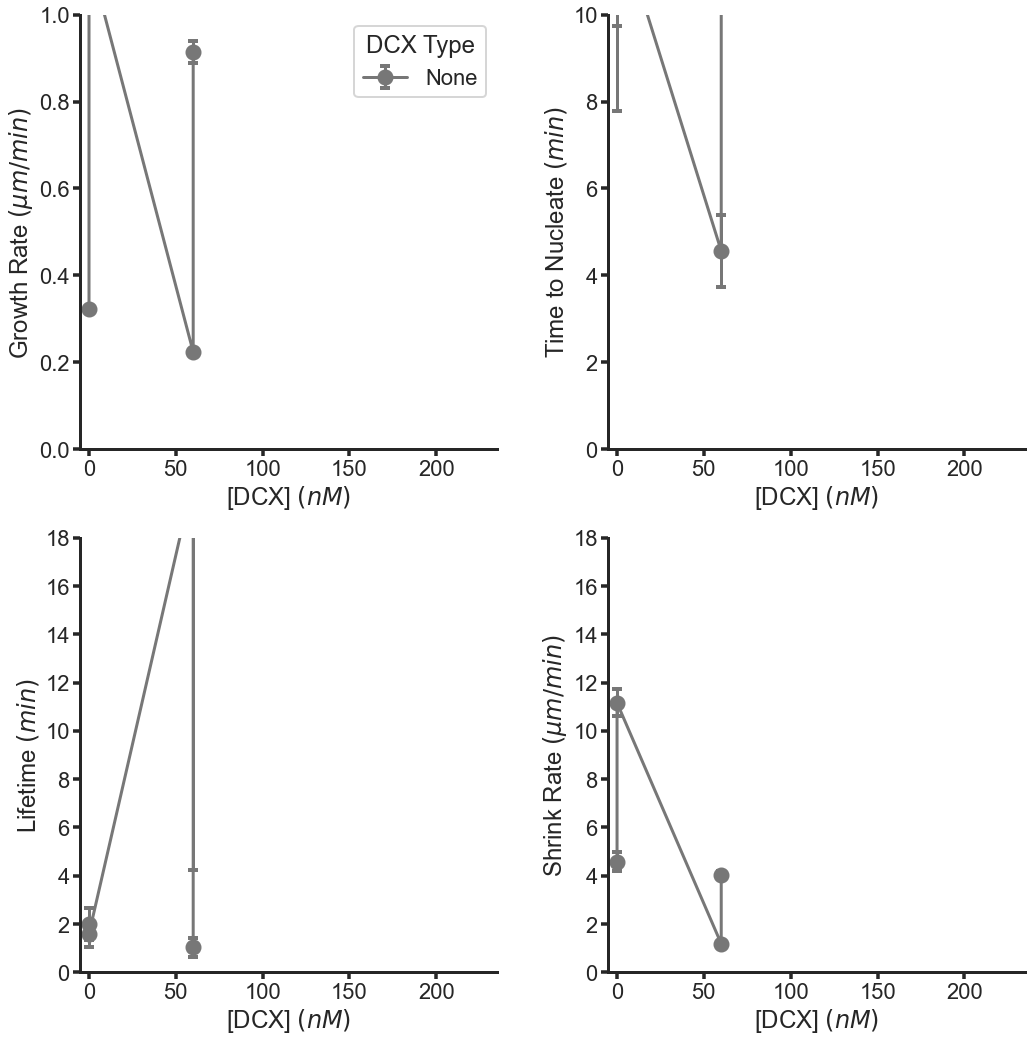

In [80]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shrinkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(2,2,figsize=(15,15))
#plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique(): #data[Type].unique() #plottypes

    x = filter_variable(DCXconc, Type, dcxtype,ResultFit[ResultFit[tubulin]==6])
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):

            y = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'Value',ResultFit[ResultFit[tubulin]==6])
            yerr = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'SE', ResultFit[ResultFit[tubulin]==6])

            ax[i][j].errorbar(x , y , yerr= yerr , fmt='',marker='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])

            c += 1
    count += 1

ax[0][0].set_ylim(0,1)
ax[1][0].set_ylim(0,18)
ax[0][1].set_ylim(0,10)
ax[1][1].set_ylim(0,18)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(-5,235)
        ax[i][j].set_xlabel(DCXconc)
        ax[i][j].set_xticks(np.arange(0, 235, 50))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend((Type_order),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

ax[0][0].legend((Type_order),loc='upper right',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_ctetubulin_all_'+date+'.pdf'))

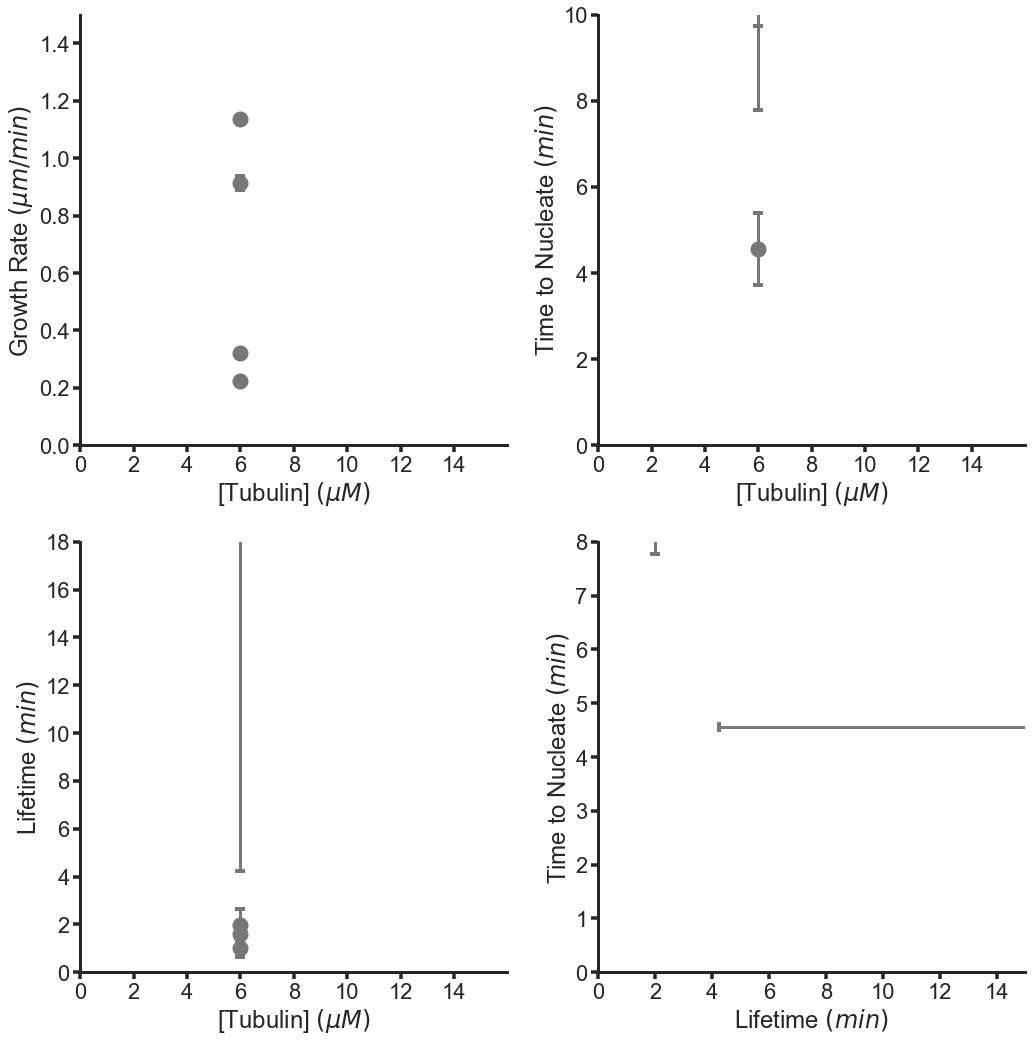

In [82]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Correlation')
ylables = (GrowthRate,TimeToNucleate,Lifetime,TimeToNucleate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(2,2,figsize=(15,15))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique():
    
    x = filter_variable(tubulin, Type, dcxtype,ResultFit)
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            
            if i == j == 1:
             continue

            y = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'Value',ResultFit)
            yerr = filter_parameter(parameters[c], 'Mean' , Type, dcxtype , 'SE', ResultFit)

            ax[i][j].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])
            c += 1
    
    ax[1][1].errorbar(filter_parameter(Lifetime, 'Mean' , Type, dcxtype , 'Value',ResultFit), filter_parameter(TimeToNucleate, 'Mean' , Type, dcxtype , 'Value',ResultFit),
                      xerr=filter_parameter(Lifetime, 'Mean' , Type, dcxtype , 'SE',ResultFit), yerr=filter_parameter(TimeToNucleate, 'Mean' , Type, dcxtype , 'SE',ResultFit),
                      markeredgewidth=4,elinewidth=3,fmt='o', markersize=scattersize,capsize = cap,color=palette[count])
    
    count += 1

ax[0][0].set_ylim(0,1.5)
ax[1][0].set_ylim(0,18)
ax[0][1].set_ylim(0,10)
ax[1][1].set_ylim(0,8)

count = 0
for i in np.arange(len(ax)):
    for j in np.arange(len(ax)):
    
        ax[i][j].set_xlim(0,16)
        ax[i][j].set_xlabel(tubulin)
        ax[i][j].set_xticks(np.arange(0, 16, 2))
        ax[i][j].set_ylabel(ylables[count])
        ax[i][j].spines['right'].set_visible(False)
        ax[i][j].spines['top'].set_visible(False)
        ax[i][j].spines['left'].set_lw(3)
        ax[i][j].spines['bottom'].set_lw(3)
        ax[i][j].tick_params(axis='both', width = 3.5, length = 7)
        #ax[i][1].legend(('None','WT','P191R'),loc='upper right',title='DCX Type')
        #ax[i][j].set_title(titles[count])
        
        count += 1

ax[1][1].set_xlim(0,15)
ax[1][1].set_xlabel(Lifetime)
ax[1][1].set_xticks(np.arange(0, 16, 2))


plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_corr_'+date+'.pdf'))

# Histogram #

In [85]:
def plot_hist(data, tubconc, dcxtype, dcxconc, ebconc, color) :
    
    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
    fig, ax = plt.subplots(2,2,figsize=(15,15))
    
    n = len(selectdata.dropna().index)
    
    c=0
    for i in np.arange(len(ax)):
        for j in np.arange(len(ax)):
            parameter = parameters[c]

            if parameter == GrowthRate :
                maxbin = 1.5
                binsize = 0.025
#             elif parameter == ShrinkageRate :
#                 maxbin = 25
#                 binsize = 0.5
            else:
                maxbin = 30
                binsize = 0.5

            ax[i][j].hist(selectdata[parameter], bins=np.arange(0, maxbin + binsize, binsize), 
                          density=True,color = color,alpha = 0.5);
            ax[i][j].set_xlabel(parameter)
            ax[i][j].set_ylabel('Probability')
            ax[1][1].set_xlim(0,maxbin)
            ax[i][j].spines['right'].set_visible(False)
            ax[i][j].spines['top'].set_visible(False)
            ax[i][j].spines['left'].set_lw(3)
            ax[i][j].spines['bottom'].set_lw(3)
            
            c += 1
    
    selectcoeff = ResultFit[ResultFit[tubulin]==tubconc]
    
    x = np.arange(0, 1.5 + 0.025, 0.025)
    mu = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[0]]['Mean'].loc['Value']
    sig = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[0]]['Coefficient 1'].loc['Value']
    ax[0][0].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    x = np.arange(0, 30 + 0.5, 0.5)
    scale = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[1]]['Mean'].loc['Value']
    ax[0][1].plot(x, exponential(x, scale),color = color, lw=4);
    
    shape = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[2]]['Coefficient 0'].loc['Value']
    scale = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[2]]['Coefficient 1'].loc['Value']
    ax[1][0].plot(x, gamma(x, shape, scale),color = color, lw=4);
            
    mu = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[3]]['Mean'].loc['Value']
    sig = selectcoeff[(selectcoeff[Type] == dcxtype)&(selectcoeff[DCXconc] == dcxconc)][parameters[3]]['Coefficient 1'].loc['Value']
    ax[1][1].plot(x, gaussian(x, mu, sig),color = color, lw=4);
    
    legnd = str(dcxconc)+' nM'
    ax[0][1].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    ax[1][0].legend(('Fit',legnd),loc='upper right',title='DCX: '+dcxtype)
    
    #plt.savefig(newmydir/('joint_graphsHIST-'+dcxtype+'-'+str(dcxconc)+'.pdf'))
    
    return print(n)

ValueError: operands could not be broadcast together with shapes (61,) (2,) 

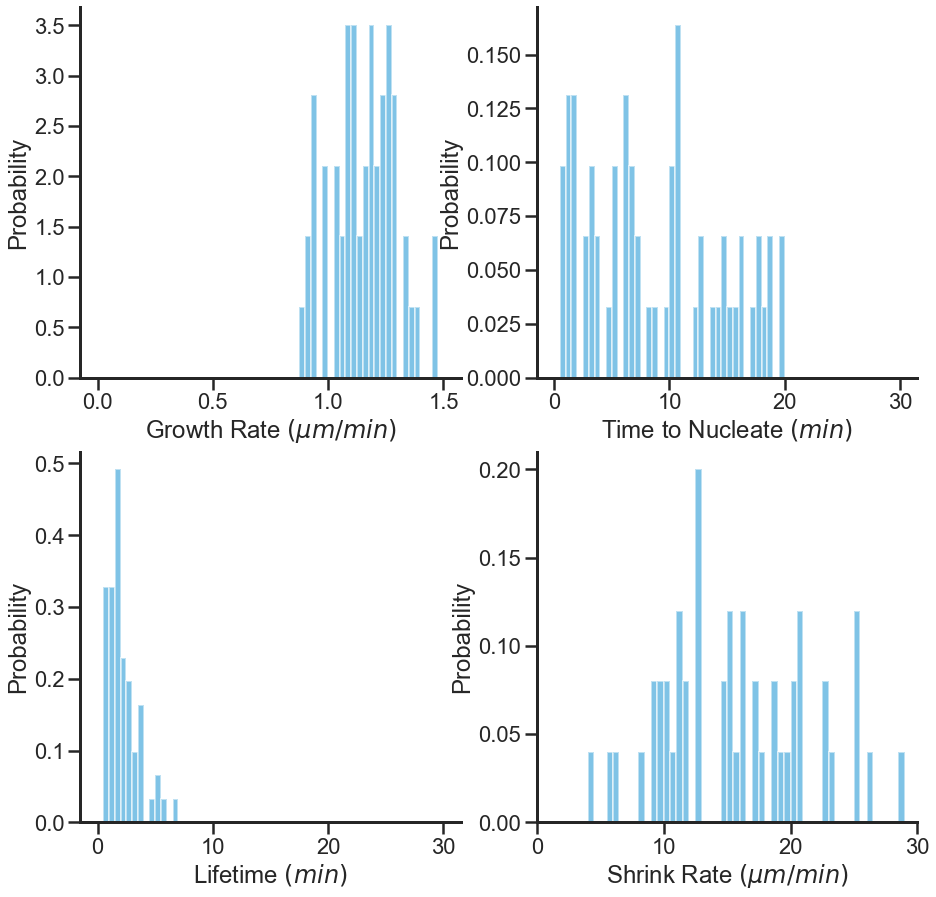

In [92]:
plot_hist(data, 6, 'WT', 0, 20, cyan)


# Rescues #

In [97]:
def rescue_count(data):
    
    results = pd.DataFrame(columns=[] , index=[])
    
    data.loc[pd.isnull(data[GrowthRate]), ['Rescues']] = np.NaN
    
    for tubconc in data[tubulin].unique():
        for dcxtype in data[Type].unique():
            for dcxconc in data[DCXconc].unique():
                for ebconc in data[EBconc].unique():
                    
                    selectdata = data[(data[tubulin]==tubconc)&(data[Type]==dcxtype)&(data[DCXconc]==dcxconc)&(data[EBconc]==ebconc)]
                    n =  selectdata['Rescues'].count()
                
                    if n == 0:
                        continue
                    
                    rv = selectdata['Rescues'].dropna().value_counts(normalize = True).to_frame()
                    rescue_values = 1-rv.loc[0][0]
                

            #======Making a data frame========
                    r0 = {tubulin:[tubconc], Type:[dcxtype], DCXconc:[dcxconc], EBconc:[ebconc], 'Normalized Rescue': [rescue_values],
                         'n': [n]}
                    results0 = pd.DataFrame(data=r0)
                    results = pd.concat([results, results0], sort=False)

        return results

In [98]:
rescues = rescue_count(data)
rescues

,[Tubulin] $(\mu M)$,DCX Type,[DCX] $(n M)$,[EB] $(n M)$,Normalized Rescue,n
0,6,WT,0,0,0.000000,12
0,6,WT,0,20,0.032787,61
0,6,WT,60,0,0.666667,21
0,6,WT,60,20,0.000000,87


In [99]:
plottypes = np.concatenate((data[Type].unique()[:2],data[Type].unique()[5:-1]), axis=None)
palette = np.concatenate((palette[:2],palette[5:-1]), axis=None)

plottypes,palette

(array(['WT'], dtype=object),
 array(['#777777', '#0089CF', '#ff5b00', '#ff8341', '#ffac83'], dtype='<U7'))

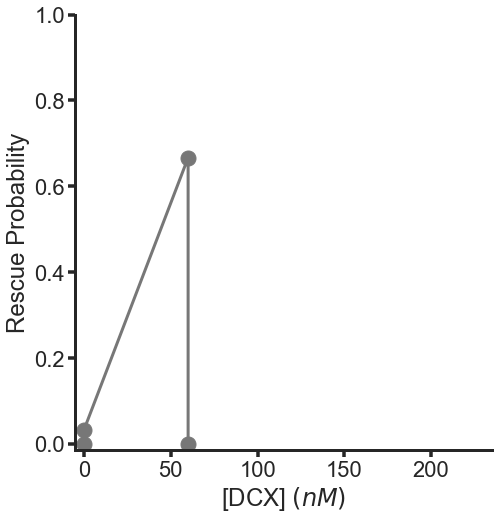

In [102]:
scattersize = 12
cap = 5

fig, ax = plt.subplots(1,1,figsize=(7.45,7.75))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique(): #data[Type].unique()

    x = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)][DCXconc]

    y = rescues[ (rescues[tubulin]==6) & (rescues[Type]== dcxtype)]['Normalized Rescue']

    ax.plot(x , y ,color=palette[count],marker = 'o', ms=15)
    count += 1

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_lw(3)
ax.spines['bottom'].set_lw(3)
ax.tick_params(axis='both', width = 3.5, length = 7)
ax.set_ylim(-0.015,1)
ax.set_xlim(-5,235)
ax.set_xlabel( DCXconc)


#ax.set_title('Rescue')
ax.set_ylabel('Rescue Probability')


#ax.legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsRescues_all.pdf'))

# Lifetime Parameters #

ValueError: min() arg is an empty sequence

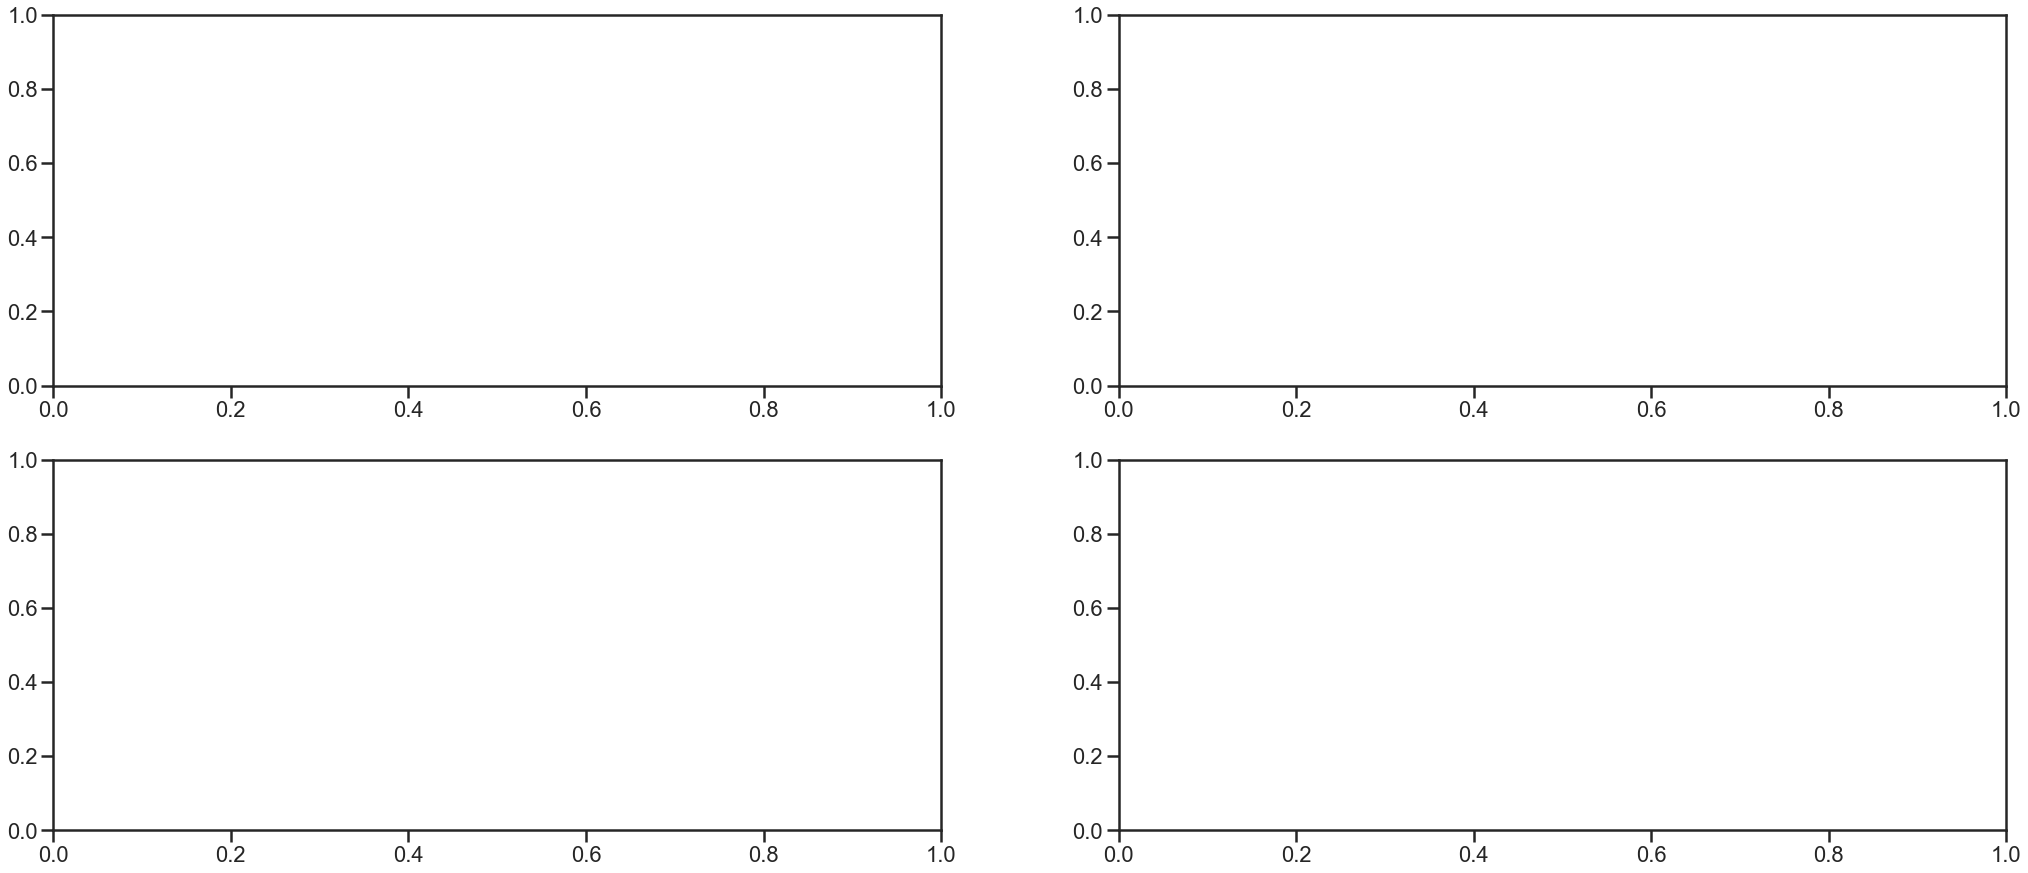

In [105]:
 selectdata = data[(data[tubulin]==6)&(data[Type]=='None')&(data[DCXconc]==0)&(data[DCXconc]==0)]

fig, axs = plt.subplots(2,2,figsize=(35,15))
sns.set_style("ticks")

c = 0
for i in [0,1]:
    for j in [0,1]:
        sns.pointplot(x='Date', y=parameters[c],
                        hue='Ch', err_style="bars", marker='o', join=False, capsize=.1,
                        data=selectdata,err_kws={'capsize':10},ci=95 , palette=palette,ax=axs[i][j])
        c += 1
axs[0][0].set_ylim(0,1.5)
axs[1][0].set_ylim(0,18)
axs[0][1].set_ylim(0,10)
axs[1][1].set_ylim(0,18)       
sns.despine()
sns.set_context("poster", font_scale=1, rc={"lines.linewidth":3.0})
plt.tight_layout()


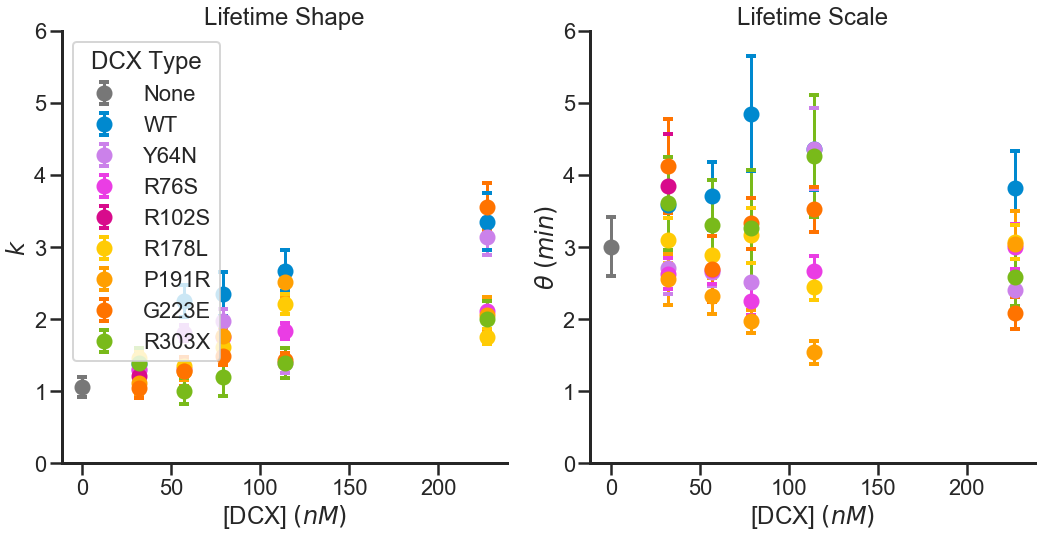

In [44]:
parameters = [GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate]
titles = ('Growth','Nucleation','Lifetime','Shronkage Rate')
ylables = (GrowthRate,TimeToNucleate,Lifetime,ShrinkageRate)

scattersize = 12
cap = 5

fig, ax = plt.subplots(1,2,figsize=(15,8))
#     plt.suptitle('Fitted pooled data', fontsize=30)

count = 0
for dcxtype in data[Type].unique():

    x = filter_variable(DCXconc, Type, dcxtype,ResultFit[ResultFit[tubulin]==6])
    
    c=2
    y = filter_parameter(parameters[c], 'Coefficient 0' , Type, dcxtype , 'Value',ResultFit[ResultFit[tubulin]==6])
    yerr = filter_parameter(parameters[c], 'Coefficient 0' , Type, dcxtype , 'SE', ResultFit[ResultFit[tubulin]==6])

    ax[0].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])
    
    y = filter_parameter(parameters[c], 'Coefficient 1' , Type, dcxtype , 'Value',ResultFit[ResultFit[tubulin]==6])
    yerr = filter_parameter(parameters[c], 'Coefficient 1' , Type, dcxtype , 'SE', ResultFit[ResultFit[tubulin]==6])

    ax[1].errorbar(x , y , yerr= yerr , fmt='o', markersize=scattersize,capsize = cap,
                              markeredgewidth=4,elinewidth=3,color=palette[count])

       
    count += 1

for i in [0,1]:
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['left'].set_lw(3)
    ax[i].spines['bottom'].set_lw(3)
    ax[i].set_ylim(0,6)
    ax[i].set_xlabel( DCXconc)


ax[0].set_title('Lifetime Shape')
ax[0].set_ylabel( r'$k$')

ax[1].set_title('Lifetime Scale')
ax[1].set_ylabel( r'$\theta \; (min)$')


ax[0].legend((Type_order),loc='upper left',title='DCX Type')
#fig.suptitle('[Tubulin] ' r'$= 6 \mu M$')
plt.tight_layout()
#plt.savefig(path.parents[0]/('joint_graphsFit_'+jointdate+'.png'))
plt.savefig(newmydir/('joint_graphsFit_lifetimeparms.pdf'))